In [3]:
import pandas as pd
df = pd.read_csv("/content/METABRIC_RNA_Mutation - METABRIC_RNA_Mutation (1).csv")

<ipython-input-3-68253c878f14>:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/METABRIC_RNA_Mutation - METABRIC_RNA_Mutation (1).csv")


In [4]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(496), int64(7), object(190)
memory usage: 10.1+ MB


In [6]:
df.describe(include='all')

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
count,1904.000000,1904.000000,1882,1904,1889,1850,1904.000000,1904,1904.000000,1874,...,1904,1904,1904,1904,1904,1904.0,1904,1904.0,1904,1904.0
unique,NaN,NaN,2,2,6,3,NaN,7,NaN,2,...,5,5,5,4,4,4.0,3,4.0,3,3.0
top,NaN,NaN,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NaN,LumA,NaN,Positve,...,0,0,0,0,0,0.0,0,0.0,0,0.0
freq,NaN,NaN,1127,1903,1500,939,NaN,679,NaN,1445,...,1900,1900,1900,1901,1901,1024.0,1902,1024.0,1902,1024.0
mean,3921.982143,61.087054,NaN,NaN,NaN,NaN,0.207983,NaN,2.643908,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2358.478332,12.978711,NaN,NaN,NaN,NaN,0.405971,NaN,1.228615,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,21.930000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,896.500000,51.375000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4730.500000,61.770000,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5536.250000,70.592500,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check missing values
df.isnull().sum()

,0
patient_id,0
age_at_diagnosis,0
type_of_breast_surgery,22
cancer_type,0
cancer_type_detailed,15
...,...
hras_mut,0
prps2_mut,0
smarcb1_mut,0
stmn2_mut,0


In [8]:
# Drop columns with excessive missing values
df = df.loc[:, df.isnull().mean() < 0.5]

In [9]:
# Filling missing values for numeric and categorical separately
for col in df.select_dtypes(include='number'):
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-9-2550184c96b7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [10]:
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-10-583e1a4ef464>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
# Removing duplicates
df.drop_duplicates(inplace=True)

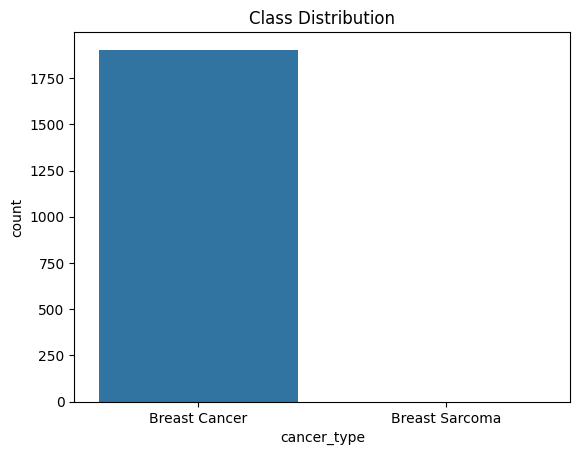

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of samples per class
sns.countplot(x='cancer_type', data=df)
plt.title("Class Distribution")
plt.show()

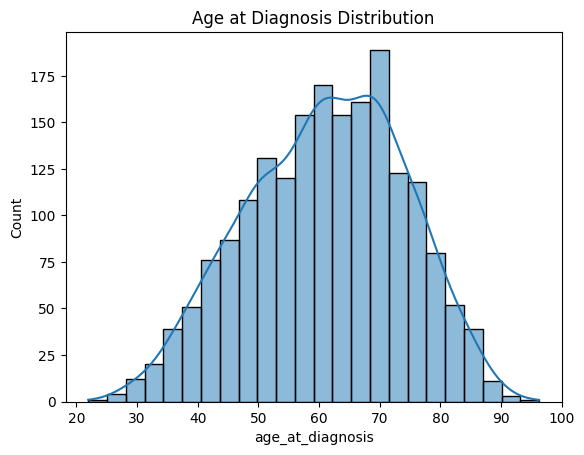

In [15]:
#Distribution of a key numeric column
sns.histplot(df['age_at_diagnosis'], kde=True)
plt.title("Age at Diagnosis Distribution")
plt.show()

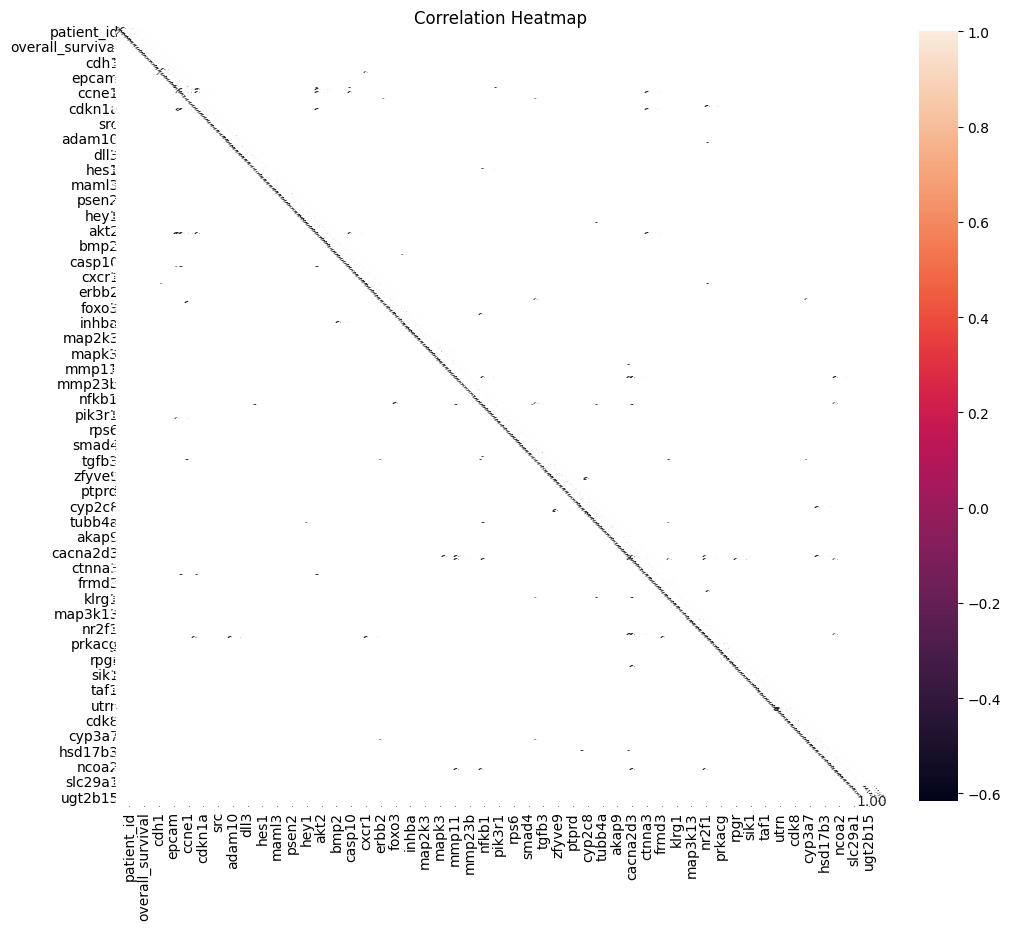

In [16]:
#Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

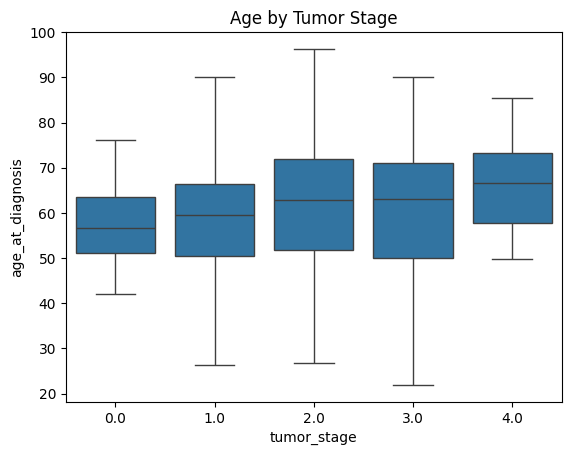

In [17]:
# Boxplot of age by tumor stage
sns.boxplot(x='tumor_stage', y='age_at_diagnosis', data=df)
plt.title("Age by Tumor Stage")
plt.show()

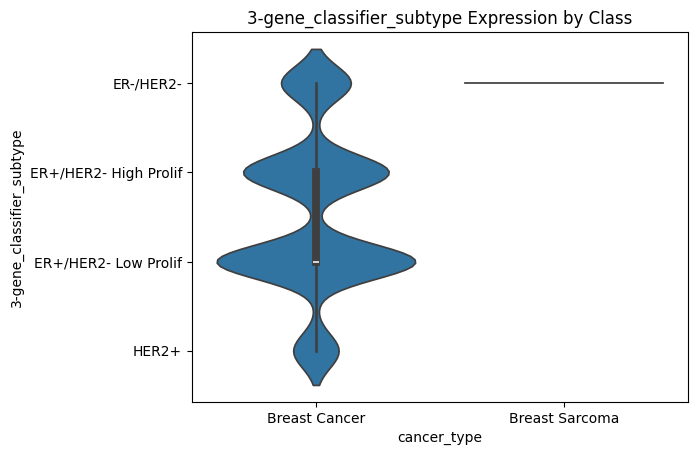

In [21]:
# Violin plot for gene expression
sns.violinplot(x='cancer_type', y='3-gene_classifier_subtype', data=df)
plt.title("3-gene_classifier_subtype Expression by Class")
plt.show()

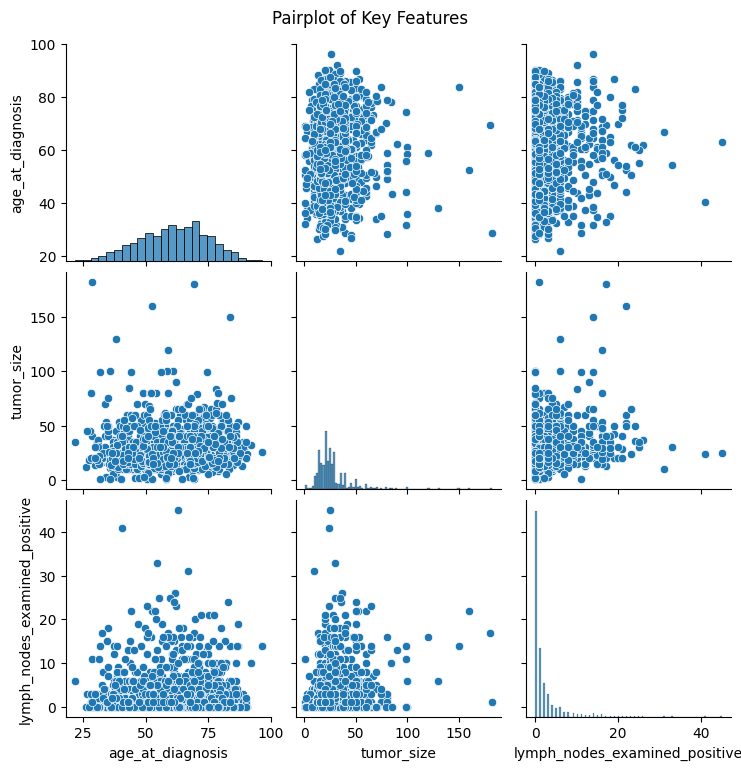

In [23]:
# Pairplot of selected numeric features
sns.pairplot(df[['age_at_diagnosis', 'tumor_size', 'lymph_nodes_examined_positive']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

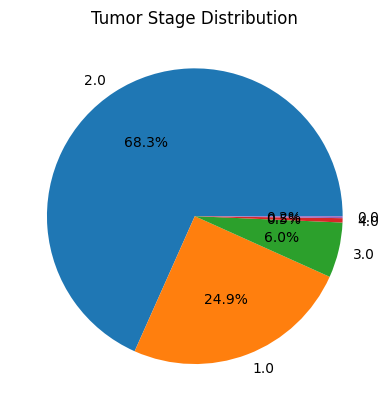

In [24]:
# Pie chart of a categorical distribution
df['tumor_stage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Tumor Stage Distribution")
plt.ylabel("")
plt.show()

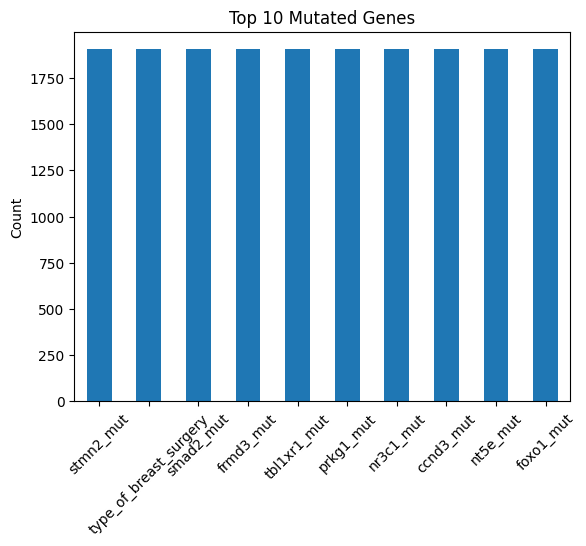

In [25]:
# Barplot of mutation count per gene
mutation_counts = (df.iloc[:, 2:] != 0).sum().sort_values(ascending=False).head(10)
mutation_counts.plot(kind='bar')
plt.title("Top 10 Mutated Genes")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

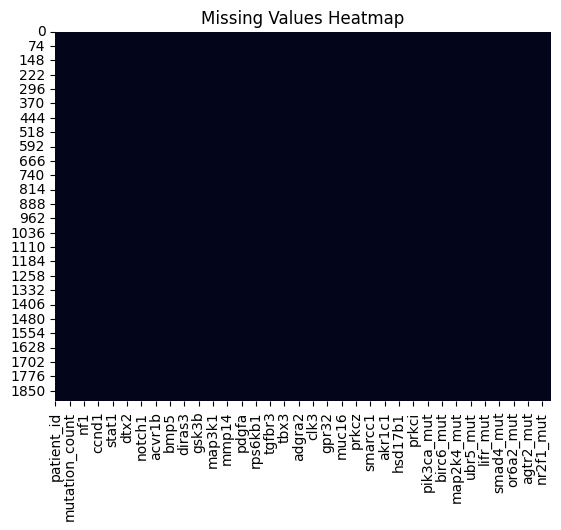

In [26]:
# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

#No missing values seen.

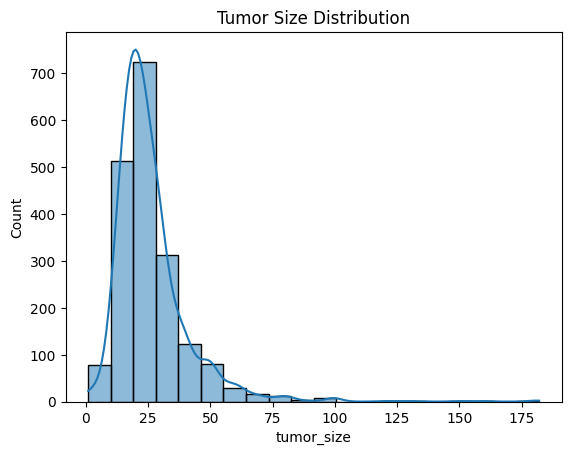

In [27]:
# Distribution of tumor size
sns.histplot(df['tumor_size'], bins=20, kde=True)
plt.title("Tumor Size Distribution")
plt.show()